In [54]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt

import matplotlib.pyplot as plt
import seaborn as sns

In [55]:
data=pd.read_csv(r'C:\Users\Shri\OneDrive\Desktop\New folder\Dataset\train.csv',sep=',')

In [56]:
data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [57]:
data.tail(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [58]:
data.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

In [59]:
print(pd.isnull(data).sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [60]:
data.shape

(891, 12)

Percentage of females who survived: 74.20382165605095
Percentage of males who survived: 18.890814558058924


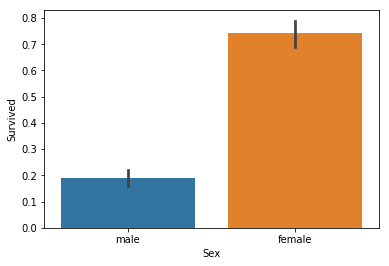

In [36]:
#draw a bar plot of survival by sex
sns.barplot(x="Sex",y="Survived", data=data)
#print percentages of females vs. males that survive
print("Percentage of females who survived:",data["Survived"][data["Sex"]=='female'].value_counts(normalize=True)[1]*100)
print("Percentage of males who survived:",data["Survived"][data["Sex"]=='male'].value_counts(normalize=True)[1]*100)

Percentage of Pclass=1 who survived: 62.96296296296296
Percentage of Pclass=2 who survived: 47.28260869565217
Percentage of Pclass=3 who survived: 24.236252545824847


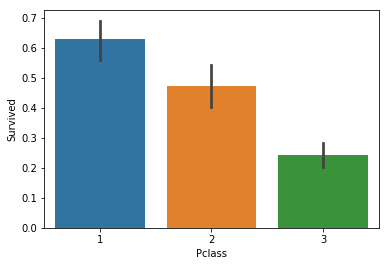

In [37]:
#draw a bar plot of survival by Pclass
sns.barplot(x="Pclass", y="Survived", data=data)

#print percentage of people by Pclass that survived
print('Percentage of Pclass=1 who survived:', data["Survived"][data["Pclass"]==1].value_counts(normalize=True)[1]*100)
print('Percentage of Pclass=2 who survived:', data["Survived"][data["Pclass"]==2].value_counts(normalize=True)[1]*100)
print('Percentage of Pclass=3 who survived:', data["Survived"][data["Pclass"]==3].value_counts(normalize=True)[1]*100)

In [38]:
# Data to plot using pie chart
labels = 'Pclass', 'Survived' 
sizes = [215, 130, 245, 210]
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue']
explode = (0.1, 0, 0, 0)  # explode 1st slice
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,


plt.axis('equal')
plt.show()

SyntaxError: invalid syntax (<ipython-input-38-22853800c291>, line 11)

In [39]:
data.describe(include="all")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Penasco y Castellana, Mr. Victor de Satode",male,NaN,NaN,NaN,1601,NaN,C23 C25 C27,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


Percentage of CabinBool = 1 who survived: 66.66666666666666
Percentage of CabinBool = 0 who survived: 29.985443959243085


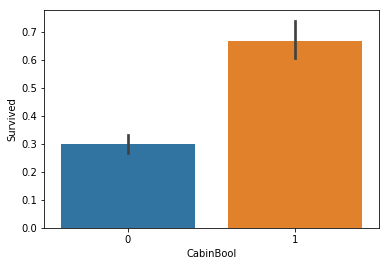

In [40]:
data["CabinBool"]=(data["Cabin"].notnull().astype('int'))
#calculate percentages of CabinBool vs. survied
print("Percentage of CabinBool = 1 who survived:",data["Survived"][data["CabinBool"]==1].value_counts(normalize=True)[1]*100)

print("Percentage of CabinBool = 0 who survived:",data["Survived"][data["CabinBool"]==0].value_counts(normalize=True)[1]*100)

# draw a bar plot of CabinBool vs. survival
sns.barplot(x="CabinBool",y="Survived",data=data)
plt.show()

In [41]:
data = data.dropna()

In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

In [43]:
data = data.drop(['Embarked','Name','Cabin','Ticket'], axis =1)

In [44]:
data['Sex']=data['Sex'].map({'male':0,'female':1})

In [45]:
X_train, X_test, y_train, y_test = train_test_split(data.drop(['Survived'],axis=1),data['Survived'], test_size=0.20,random_state=8)

In [46]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

C:\Users\Shri\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [47]:
predictions = logmodel.predict(X_test)
X_test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,CabinBool
809,810,1,1,33.0,1,0,53.1000,1
137,138,1,0,37.0,1,0,53.1000,1
496,497,1,1,54.0,1,0,78.2667,1
659,660,1,0,58.0,0,2,113.2750,1
3,4,1,1,35.0,1,0,53.1000,1


In [48]:
accuracy=logmodel.score(X_test,y_test)
print(accuracy*100,'%')

81.08108108108108 %


In [49]:
predictions

array([1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0], dtype=int64)

In [50]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.83      0.67      0.74        15
           1       0.80      0.91      0.85        22

   micro avg       0.81      0.81      0.81        37
   macro avg       0.82      0.79      0.80        37
weighted avg       0.81      0.81      0.81        37



In [51]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predictions)

array([[10,  5],
       [ 2, 20]], dtype=int64)

In [52]:
#homework
#fillnull 
data.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Sex            False
Age            False
SibSp          False
Parch          False
Fare           False
CabinBool      False
dtype: bool